# Validation

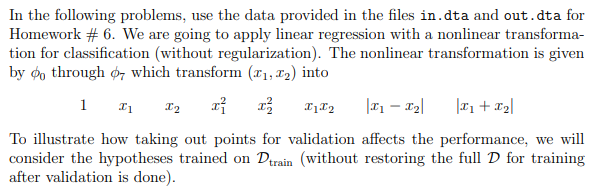

In [1]:
#load data

import requests

try:
    with open("in.dta", "x") as f_in:
        request_in = requests.get("http://work.caltech.edu/data/in.dta")
        f_in.write(request_in.text)
        print("Downloaded training data")
except FileExistsError as e:
    print("Training data already downloaded")

try:
    with open("out.dta", "x") as f_out:
        request_out = requests.get("http://work.caltech.edu/data/out.dta")
        f_out.write(request_out.text)
        print("Downloaded test data")
except FileExistsError as e:
    print("Test data already downloaded")

Training data already downloaded
Test data already downloaded


In [6]:
import numpy as np

training_data = np.loadtxt("in.dta")
testing_data = np.loadtxt("out.dta")

train_data_x, train_data_y = training_data[0:25,0:2], training_data[0:25,2]
val_data_x, val_data_y = training_data[25:,0:2], training_data[25:,2]
 = testing_data[:,0:2], testing_data[:,2]

def phi(X):
    Z = np.zeros((X.shape[0],8))
    Z[:,0] = 1 
    Z[:,1] = X[:,0]
    Z[:,2] = X[:,1]
    Z[:,3] = X[:,0]**2
    Z[:,4] = X[:,1]**2
    Z[:,5] = X[:,0]*X[:,1]
    Z[:,6] = np.abs(X[:,0] - X[:,1])
    Z[:,7] = np.abs(X[:,0] + X[:,1])
    return Z

## Question 1:

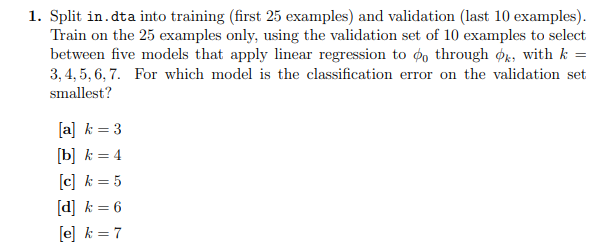

Out of sample classification error for k = 3 is: 0.3
Out of sample classification error for k = 4 is: 0.5
Out of sample classification error for k = 5 is: 0.2
Out of sample classification error for k = 6 is: 0.0
Out of sample classification error for k = 7 is: 0.1


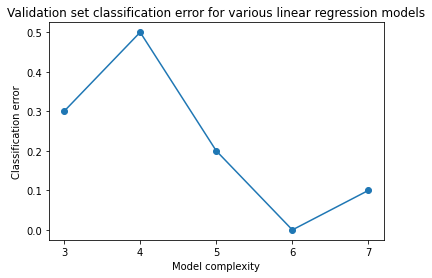

In [22]:
import matplotlib.pyplot as plt

k_values = list(range(3,8))
classification_errors = []
w_vectors = [] #will reuse in next question

#regular setup:
train_x, train_y = train_data_x, train_data_y
test_x, test_y = val_data_x, val_data_y

for k in k_values:
    X = phi(train_x)[:,:k+1]
    w = np.linalg.inv(X.T@X)@X.T@train_y
    w_vectors.append(w)
    prediction = np.sign(phi(test_x)[:,:k+1]@w)
    classification_errors.append(np.mean(prediction != test_y))

for i,error in enumerate(classification_errors):
    print(f'Out of sample classification error for k = {i+3} is: {error}')
    
fig, ax = plt.subplots()
ax.plot(k_values,classification_errors, marker='o')
ax.set(xlabel='Model complexity', ylabel='Classification error', title='Validation set classification error for various linear regression models')
plt.xticks(k_values)
plt.show()

Correct Answer: **D**

Minimal classification error for $k=6$

## Question 2:

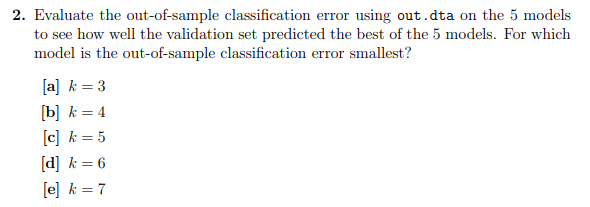

Out of sample classification error for k = 3 is: 0.42
Out of sample classification error for k = 4 is: 0.416
Out of sample classification error for k = 5 is: 0.188
Out of sample classification error for k = 6 is: 0.084
Out of sample classification error for k = 7 is: 0.072


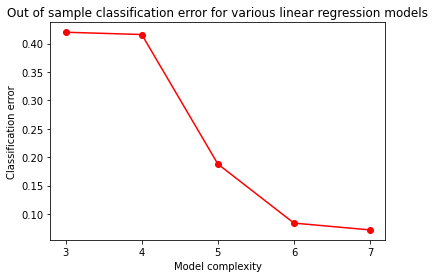

In [25]:
k_values = list(range(3,8))
out_of_sample_errors = []

for k in k_values:
    w = w_vectors[k-3]
    prediction = np.sign(phi(test_data_x)[:,:k+1]@w)
    out_of_sample_errors.append(np.mean(prediction != test_data_y))


for i,error in enumerate(out_of_sample_errors):
    print(f'Out of sample classification error for k = {i+3} is: {error}')
    
fig, ax = plt.subplots()
ax.plot(k_values,out_of_sample_errors, marker='o',color='red')
ax.set(xlabel='Model complexity', ylabel='Classification error', title='Out of sample classification error for various linear regression models')
plt.xticks(k_values)
plt.show()

Correct Answer: **E** 

Best out of sample classification performance when $k=7$

## Question 3:

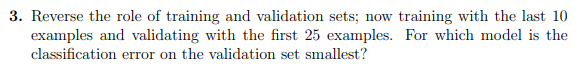
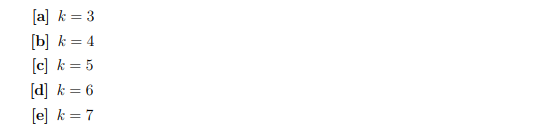

Out of sample classification error for k = 3 is: 0.28
Out of sample classification error for k = 4 is: 0.36
Out of sample classification error for k = 5 is: 0.2
Out of sample classification error for k = 6 is: 0.08
Out of sample classification error for k = 7 is: 0.12


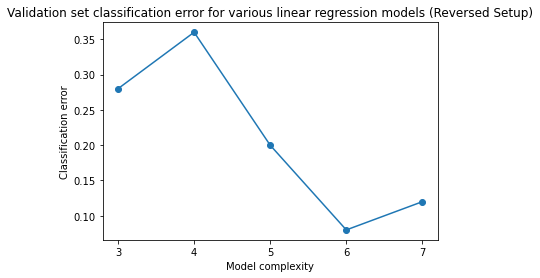

In [23]:
import matplotlib.pyplot as plt

k_values = list(range(3,8))
classification_errors = []
w_vectors_reversed = []

#reversed setup:
train_x, train_y = val_data_x, val_data_y
test_x, test_y = train_data_x, train_data_y

for k in k_values:
    X = phi(train_x)[:,:k+1]
    w = np.linalg.inv(X.T@X)@X.T@train_y
    w_vectors_reversed.append(w)
    prediction = np.sign(phi(test_x)[:,:k+1]@w)
    classification_errors.append(np.mean(prediction != test_y))

for i,error in enumerate(classification_errors):
    print(f'Out of sample classification error for k = {i+3} is: {error}') 
    
fig, ax = plt.subplots()
ax.plot(k_values,classification_errors, marker='o')
ax.set(xlabel='Model complexity', ylabel='Classification error', title='Validation set classification error for various linear regression models (Reversed Setup)')
plt.xticks(k_values)
plt.show()

Correct Answer: **D**

$k=6$ still produces the smallest classification error (within the validation set)

## Question 4:

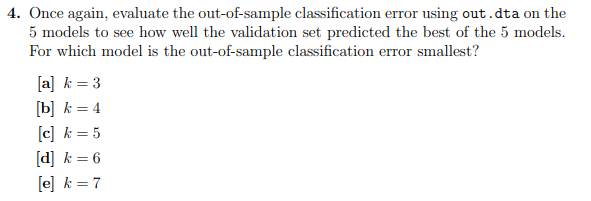

Out of sample classification error for k = 3 is: 0.396
Out of sample classification error for k = 4 is: 0.388
Out of sample classification error for k = 5 is: 0.284
Out of sample classification error for k = 6 is: 0.192
Out of sample classification error for k = 7 is: 0.196


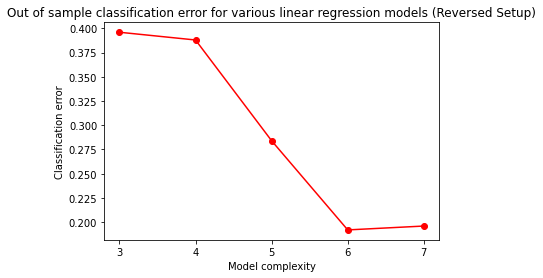

In [36]:
k_values = list(range(3,8))
out_of_sample_errors = []

for k in k_values:
    w = w_vectors_reversed[k-3]
    prediction = np.sign(phi(test_data_x)[:,:k+1]@w)
    out_of_sample_errors.append(np.mean(prediction != test_data_y))


for i,error in enumerate(out_of_sample_errors):
    print(f'Out of sample classification error for k = {i+3} is: {error}')
    
fig, ax = plt.subplots()
ax.plot(k_values,out_of_sample_errors, marker='o',color='red')
ax.set(xlabel='Model complexity', ylabel='Classification error', title='Out of sample classification error for various linear regression models (Reversed Setup)')
plt.xticks(k_values)
plt.show()

Correct Answer: **D** 

Smallest out of sample classification error is achieved with $k=6$

## Question 5:

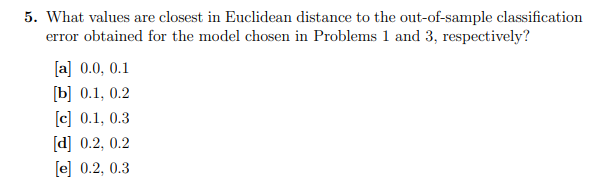

In [28]:
print(f'Distance from out-of-sample classification errors: (0.084,0.192) to (0.0,0.1) = {np.linalg.norm(np.array((0.084,0.192)) - np.array((0.0,0.1)))}')
print(f'Distance from out-of-sample classification errors: (0.084,0.192) to (0.1,0.2) = {np.linalg.norm(np.array((0.084,0.192)) - np.array((0.1,0.2)))}')
print(f'Distance from out-of-sample classification errors: (0.084,0.192) to (0.1,0.3) = {np.linalg.norm(np.array((0.084,0.192)) - np.array((0.1,0.3)))}')
print(f'Distance from out-of-sample classification errors: (0.084,0.192) to (0.2,0.2) = {np.linalg.norm(np.array((0.084,0.192)) - np.array((0.2,0.2)))}')
print(f'Distance from out-of-sample classification errors: (0.084,0.192) to (0.2,0.3) = {np.linalg.norm(np.array((0.084,0.192)) - np.array((0.2,0.3)))}')

Distance from out-of-sample classification errors: (0.084,0.192) to (0.0,0.1) = 0.12457929201917949
Distance from out-of-sample classification errors: (0.084,0.192) to (0.1,0.2) = 0.01788854381999832
Distance from out-of-sample classification errors: (0.084,0.192) to (0.1,0.3) = 0.10917875251164944
Distance from out-of-sample classification errors: (0.084,0.192) to (0.2,0.2) = 0.11627553482998906
Distance from out-of-sample classification errors: (0.084,0.192) to (0.2,0.3) = 0.15849290204927158


Correct Answer: **B**

Closest to 0.1 and 0.2

<hr />

# Validation Bias

## Question 6:

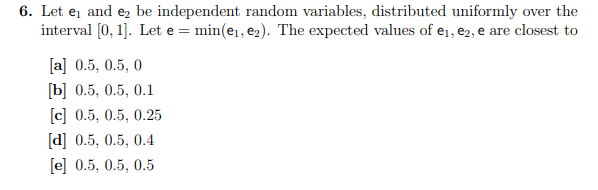

In [38]:
rand = np.random.uniform(0,1,(1000000,3))

for row_num in range(1000000):
    rand[row_num,2] = min(rand[row_num,0],rand[row_num,1])
    
print(f'Expected value of e_1 is = {np.mean(rand[:,0])}')
print(f'Expected value of e_2 is = {np.mean(rand[:,1])}')
print(f'Expected value of min(e_1,e_2) is = {np.mean(rand[:,2])}')

Expected value of e_1 is = 0.5002175165643379
Expected value of e_2 is = 0.49988563358278915
Expected value of min(e_1,e_2) is = 0.3333173549103436


Correct Answer: **D**

0.5, 0.5, 0.333 is closest to 0.5, 0.5, 0.4

This can be calculated analytically: 

It can be shown that the cdf of $\text{min}(e_1, e_2)$ is given by: $F(x) = P(X \leq x) = 2x-x^2$, by differentiating we can get the pdf $f(x) = 2-2x$. The expectation of this value is calculated by integrating: 

$$
\mathbb{E}_x(\text{min}(e_1, e_2)) := \int_0^1 x\cdot f(x) \ dx = \int_0^1 2x-2x^2 \ dx = \left[x^2 - \frac{2}{3}x^3 \right]_0^1 = \frac{1}{3}
$$

<hr />

# Cross Validation

## Question 7:

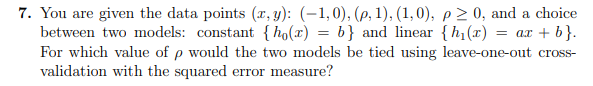

<hr />

# PLA vs. SVM

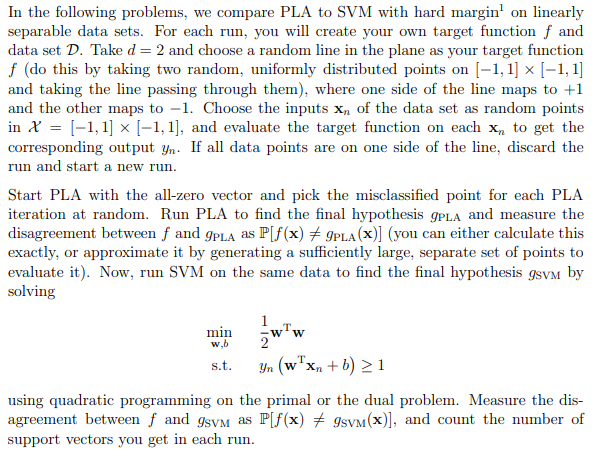

## Question 8:

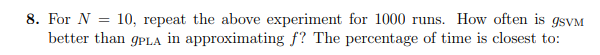

## Question 9:

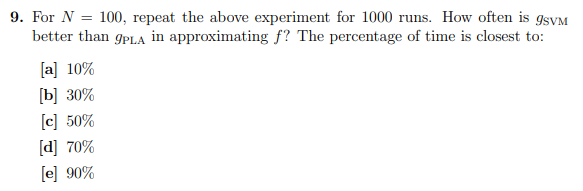

## Question 10:

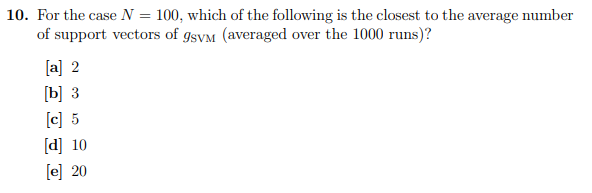